In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
from digitization_to_segy import Reader, Processing, PostProcessing, Saver

sys.path.remove('../')

In [2]:
img = Reader.read_png('data/d.png')

In [3]:
segy = Reader.read_segy('data/section_1.sgy')

In [4]:
data = Processing.rgb_to_amplitude(img)

In [5]:
data2 = Processing.rgb_to_amplitude1(img)

In [6]:
img.shape, data.shape, data2.shape

((598, 962, 3), (598, 962), (598, 962))

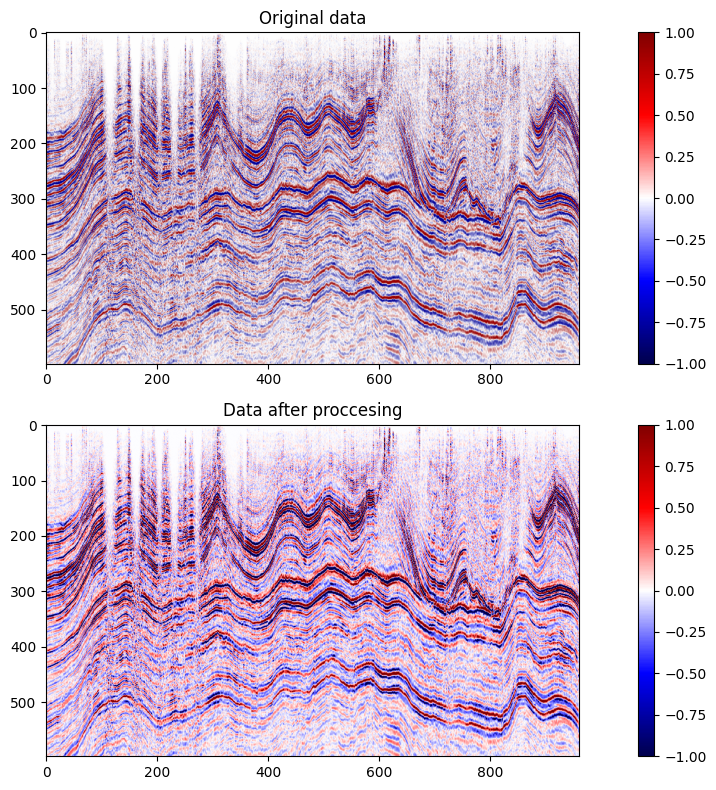

In [54]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
im1 = axs[0].imshow(img, cmap='seismic', vmin=-1, vmax=1)
im2 = axs[1].imshow(data, cmap='seismic', vmin=-1, vmax=1)

axs[0].set_title('Original data')
axs[1].set_title('Data after proccesing')
fig.colorbar(im1)
fig.colorbar(im2)

fig.tight_layout()

In [8]:
data_res = PostProcessing.resize_array(data=data, trace_count=3867, n_samples=751)

In [80]:
norm = np.max(abs(data_res), axis=0)
# norm = np.max(abs(data_res))
png_to_segy_plot = np.copy(data_res)
# mask = np.array(png_to_segy_plot == 0)
# png_to_segy_plot[~mask] /= norm
for i in range(png_to_segy_plot.shape[1]):
    mask = np.array(png_to_segy_plot[:,i] == 0)
    png_to_segy_plot[:,i][~mask] /= norm[i]
png_to_segy_plot *= -1

In [81]:
norm = np.max(abs(segy), axis=0)
# norm = np.max(abs(segy))
segy_plot = np.copy(segy)
# mask = np.array(segy_plot == 0)
# segy_plot[~mask] /= norm
for i in range(segy_plot.shape[1]):
    mask = np.array(segy_plot[:,i] == 0)
    segy_plot[:,i][~mask] /= norm[i]
segy_plot = np.flip(segy_plot, axis=1)

In [82]:
segy_plot.shape, mask.shape

((751, 3867), (751,))

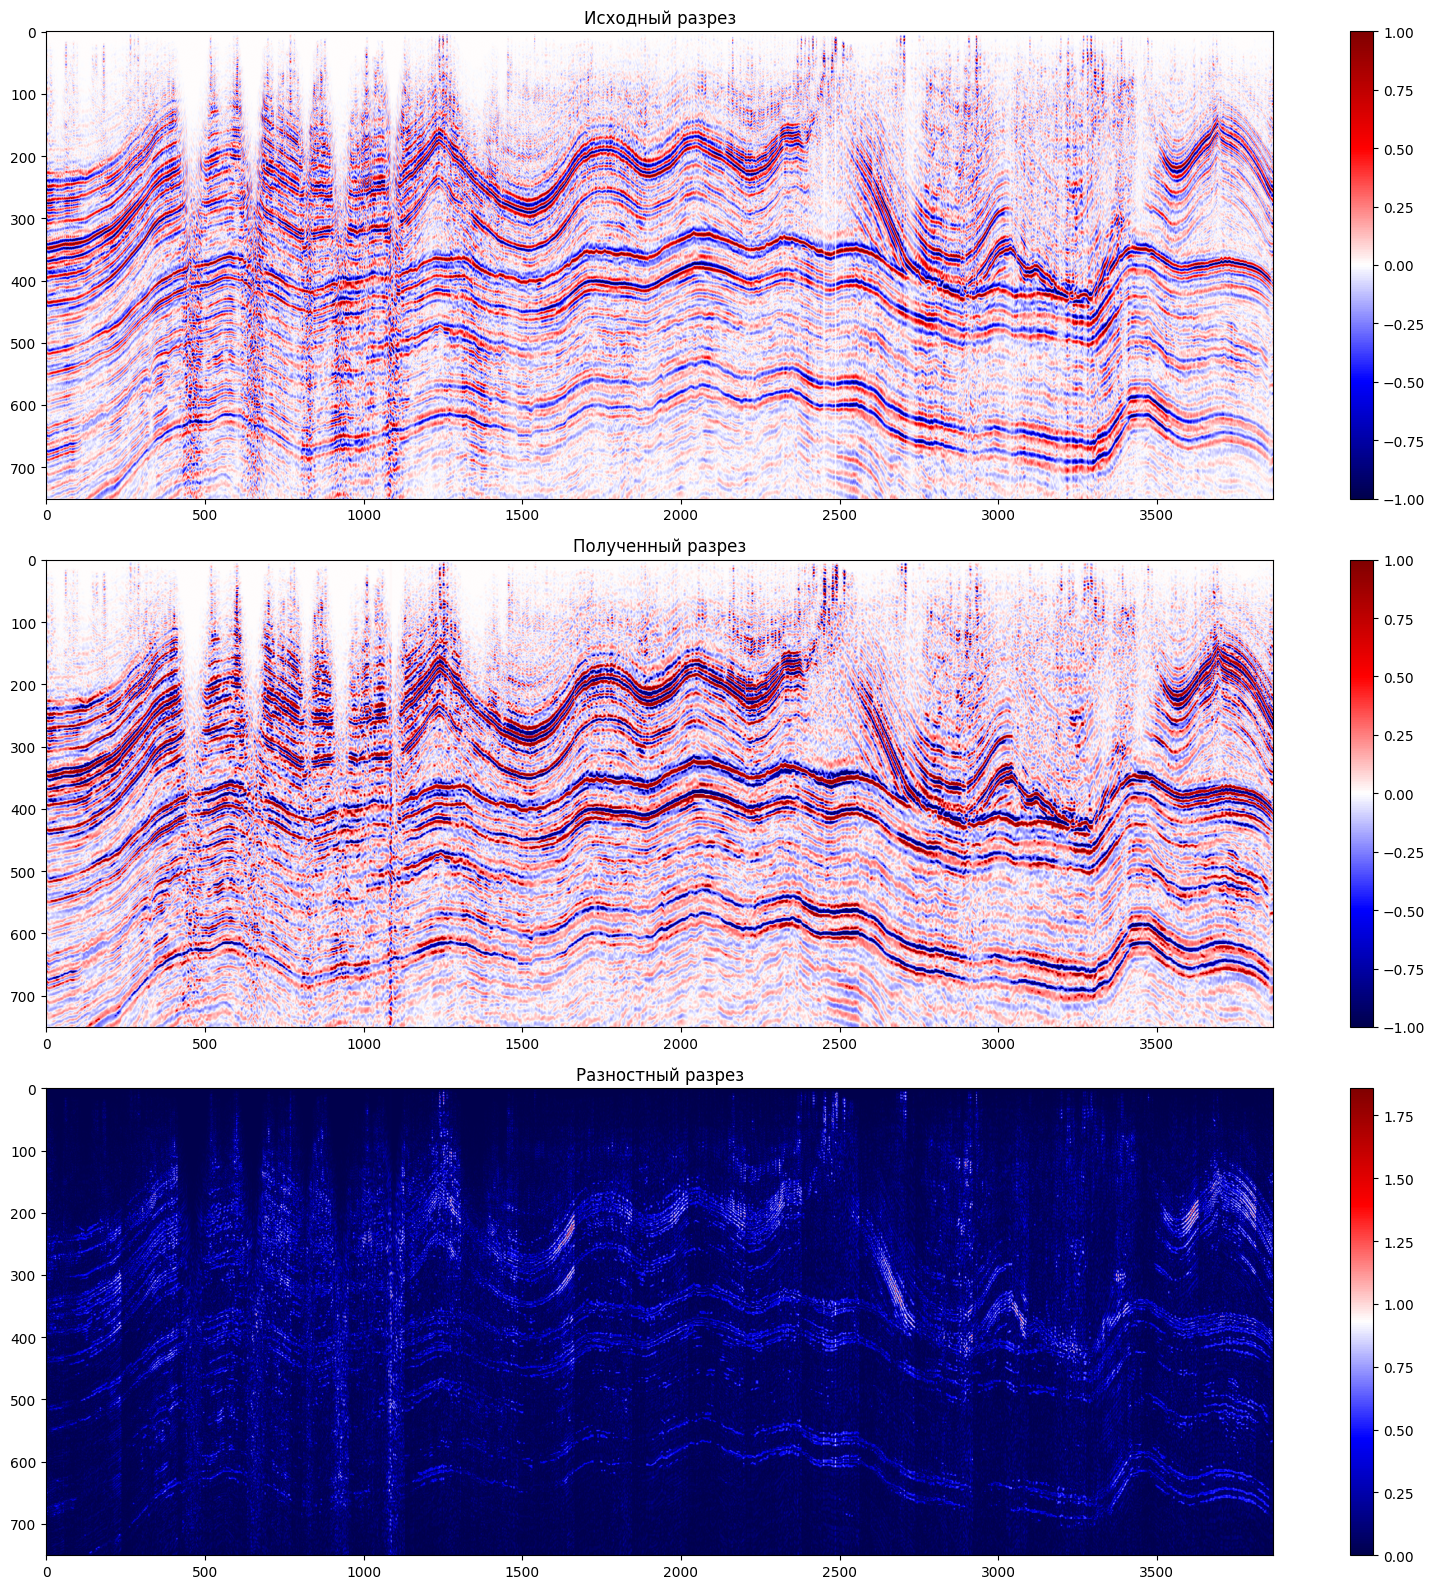

In [83]:
fig, axs = plt.subplots(3, 1, figsize=(16,16))

im1 = axs[0].imshow(segy_plot, aspect='auto', cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(png_to_segy_plot, aspect='auto', cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(im2, ax=axs[1])

diff = abs(png_to_segy_plot - segy_plot)
im3 = axs[2].imshow(diff, aspect='auto', cmap='seismic')
plt.colorbar(im3, ax=axs[2])

axs[0].set_title('Исходный разрез')
axs[1].set_title('Полученный разрез')
axs[2].set_title('Разностный разрез')

fig.tight_layout()

In [84]:
np.sum(diff)/diff.shape[0]/diff.shape[1]

np.float64(0.09847155717502673)

In [86]:
matrix = np.array([np.corrcoef(segy_plot[:,i], png_to_segy_plot[:,i])[0,1] for i in range(segy_plot.shape[1])])

In [87]:
matrix

array([0.94987335, 0.83928198, 0.72021057, ..., 0.86889776, 0.75268342,
              nan], shape=(3867,))

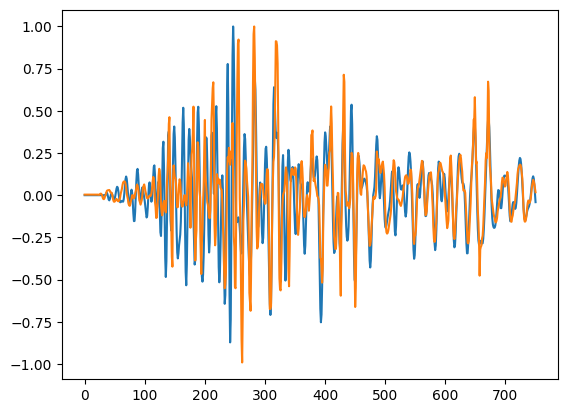

In [103]:
plt.plot(segy_plot[:,1000])
plt.plot(png_to_segy_plot[:,1000])

(0.0, 1.0)

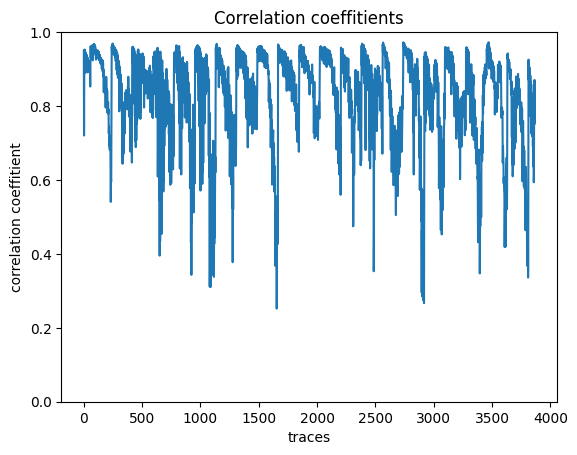

In [88]:
plt.plot(matrix)
plt.title('Correlation coeffitients')
plt.xlabel('traces')
plt.ylabel('correlation coeffitient')
plt.ylim([0, 1])

In [89]:
all_matrix = np.corrcoef(segy_plot.ravel(), png_to_segy_plot.ravel())

Text(0.5, 1.0, 'Correlation matrix')

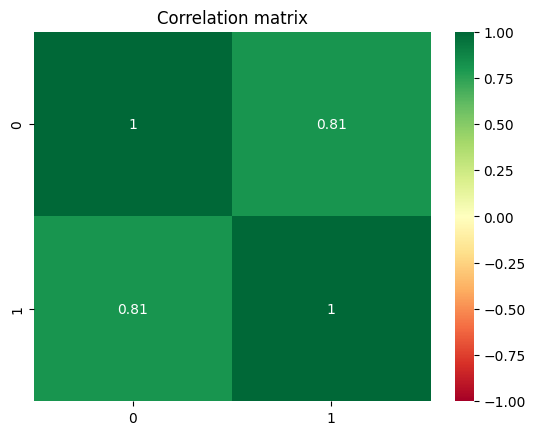

In [90]:
sns.heatmap(all_matrix, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)
plt.title('Correlation matrix')

(-0.015, 0.035)

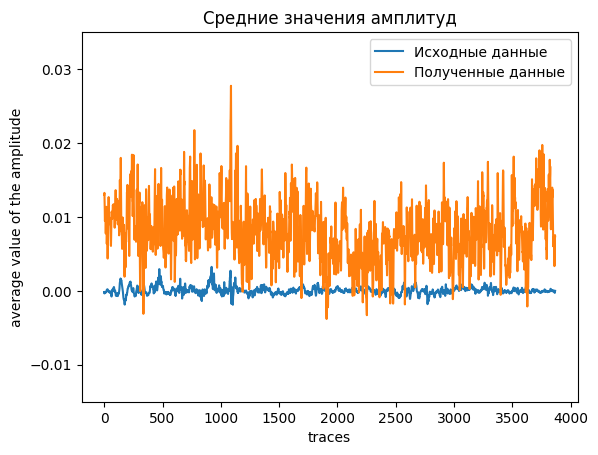

In [91]:
plt.plot(np.mean(segy_plot, axis=0), label='Исходные данные')
plt.plot(np.mean(png_to_segy_plot, axis=0), label='Полученные данные')
plt.legend(loc='upper right')
plt.title('Средние значения амплитуд')
plt.xlabel('traces')
plt.ylabel('average value of the amplitude')

plt.ylim([-0.015, 0.035])

In [92]:
def get_rmsd(segy_plot, data_res):
    return np.sqrt(np.sum((segy_plot - data_res)**2)/(segy_plot.shape[0]*segy_plot.shape[1]))

In [93]:
def get_nrmsd(segy_plot, data_res):
    return np.sqrt(np.sum((segy_plot - data_res)**2)/np.sum(data_res**2))

In [96]:
get_rmsd(segy_plot, png_to_segy_plot)

np.float64(0.16103768272515656)

In [97]:
get_nrmsd(segy_plot, png_to_segy_plot)

np.float64(0.5915503497994014)

In [99]:
Saver.save_segy('data/my_segy', png_to_segy_plot.T)

C:\Users\PrimakovaYulia\AppData\Local\pypoetry\Cache\virtualenvs\digitization-to-segy-g60wD6wC-py3.12\Lib\site-packages\segyio\utils.py:18: RuntimeWarning: Implicit conversion to contiguous array
  warnings.warn(msg, RuntimeWarning)
